# **Exploratory Data Analysis**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load dataset
import pandas as pd
file1 = "/content/drive/MyDrive/bioactivity/bioactivity_preprocessed_data.csv"
df = pd.read_csv(file1)
df.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,intermediate,413.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,2.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,intermediate,460.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,inactive,9000.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,inactive,5600.0


In [4]:
# create new df by removing the canonical_smiles column

df_wo_smiles = df.drop(columns='canonical_smiles')

In [5]:
# Clean SMLIES. If a compound consist of multiple fragments  present, keep only longest fragment

smiles = []


# Loop through each SMILES string, split by '.', and keep the longest fragment if multiple fragments are present.
for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

# Convert the processed SMILES list into a Pandas Series
smiles = pd.Series(smiles, name = 'canonical_smiles')


In [6]:
# Concatenate the DataFrame without SMILES (df_wo_smiles) and the processed SMILES Series along columns
df_clean_smiles = pd.concat([df_wo_smiles, smiles], axis=1)


df_clean_smiles.head()

,molecule_chembl_id,bioactivity_class,standard_value,canonical_smiles
0,CHEMBL406146,intermediate,413.0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...
1,CHEMBL78946,active,2.0,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...
2,CHEMBL324109,intermediate,460.0,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...
3,CHEMBL114147,inactive,9000.0,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...
4,CHEMBL419949,inactive,5600.0,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...


## **Calculate Lipinski descriptors**

These rules help evaluate the drug-likeness of a compound.

*   Molecular weight < 500 Dalton
*   Octanol-water partition coefficient (LogP) < 5
*   Hydrogen bond donors < 5
*   Hydrogen bond acceptors < 10
*






In [7]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 35.4 MB/s eta 0:00:00


In [8]:
# import libraries
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

In [9]:
# Function to calculate Lipinski descriptors
def calculate_lipinski(smiles):
    mol = Chem.MolFromSmiles(smiles)  # Convert SMILES to RDKit Mol object
    if mol is None:
        return None, None, None, None

    # Calculate Lipinski descriptors
    mw = Descriptors.MolWt(mol)  # Molecular weight
    logp = Descriptors.MolLogP(mol)  # LogP (octanol-water partition coefficient)
    hbd = Descriptors.NumHDonors(mol)  # Number of hydrogen bond donors
    hba = Descriptors.NumHAcceptors(mol)  # Number of hydrogen bond acceptors

    return mw, logp, hbd, hba

In [10]:
# Assuming 'df' is the DataFrame containing a 'canonical_smiles' column
# Initialize empty lists to store the descriptors
mol_wt_list = []
logp_list = []
hbd_list = []
hba_list = []

# Loop through each SMILES string in the DataFrame and calculate descriptors
for smiles in df_clean_smiles['canonical_smiles']:
    mw, logp, hbd, hba = calculate_lipinski(smiles)
    mol_wt_list.append(mw)
    logp_list.append(logp)
    hbd_list.append(hbd)
    hba_list.append(hba)

In [11]:
# Create new columns in the DataFrame for each Lipinski descriptor
df_clean_smiles['Molecular_Weight'] = mol_wt_list
df_clean_smiles['LogP'] = logp_list
df_clean_smiles['HBD'] = hbd_list  # Hydrogen Bond Donors
df_clean_smiles['HBA'] = hba_list  # Hydrogen Bond Acceptors

# Display the DataFrame with Lipinski descriptors
df_clean_smiles.head()

,molecule_chembl_id,bioactivity_class,standard_value,canonical_smiles,Molecular_Weight,LogP,HBD,HBA
0,CHEMBL406146,intermediate,413.0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,999.085,-1.4355,13,13
1,CHEMBL78946,active,2.0,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,893.005,-1.7361,12,12
2,CHEMBL324109,intermediate,460.0,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,751.988,2.3535,8,9
3,CHEMBL114147,inactive,9000.0,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,737.895,1.9626,8,8
4,CHEMBL419949,inactive,5600.0,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,828.020,3.5739,8,8


In [12]:
df_clean_smiles.standard_value.describe()

,standard_value
count,1.057400e+04
mean,3.419690e+04
std,9.516582e+05
min,2.000000e-04
25%,2.500000e+01
50%,1.967500e+02
75%,2.310000e+03
max,8.600000e+07


# **Convert IC50 to pIC50**

Convert IC50 to the negative logarithmic scale which is essentially -log10(IC50), to have a uniformly distributed IC50.

In [13]:
import numpy as np

def pIC50(df):
    # Step 1: Replace zero IC50 values with NaN to avoid undefined log(0) errors
    df['standard_value'] = df['standard_value'].replace(0, np.nan)

    # Step 2: Convert IC50 from nanomolar (nM) to molar (M) by multiplying by 10^(-9)
    molar_ic50 = df['standard_value'] * 1e-9

    # Step 3: Apply the -log10 transformation to calculate pIC50
    pIC50_values = -np.log10(molar_ic50)

    # Step 4: Add the new pIC50 values as a new column
    df['pIC50'] = pIC50_values

    return df

In [14]:
# Example usage of the function
df = pIC50(df_clean_smiles)

# Display the first few rows of the DataFrame to verify the conversion
df_clean_smiles.head()

,molecule_chembl_id,bioactivity_class,standard_value,canonical_smiles,Molecular_Weight,LogP,HBD,HBA,pIC50
0,CHEMBL406146,intermediate,413.0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,999.085,-1.4355,13,13,6.384050
1,CHEMBL78946,active,2.0,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,893.005,-1.7361,12,12,8.698970
2,CHEMBL324109,intermediate,460.0,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,751.988,2.3535,8,9,6.337242
3,CHEMBL114147,inactive,9000.0,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,737.895,1.9626,8,8,5.045757
4,CHEMBL419949,inactive,5600.0,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,828.020,3.5739,8,8,5.251812


In [15]:
df_clean_smiles.pIC50.describe()

,pIC50
count,10574.000000
mean,6.584469
std,1.355137
min,1.065502
25%,5.636388
50%,6.706088
75%,7.602060
max,12.698970


In [16]:
# write to csv file
df_clean_smiles.to_csv('beta_secretase1_bioactivity_data_pIC50.csv',index=False)

In [17]:
! cp beta_secretase1_bioactivity_data_pIC50.csv "/content/drive/MyDrive/bioactivity/"

In [18]:
! ls "/content/drive/MyDrive/bioactivity/"

beta_secretase1_bioactivity_data_pIC50.csv  bioactivity_data.csv  bioactivity_preprocessed_data.csv


In [21]:
df_final = df_clean_smiles.drop(columns='standard_value')

# **Bioactivity Class Distribution**

<Axes: xlabel='bioactivity_class'>

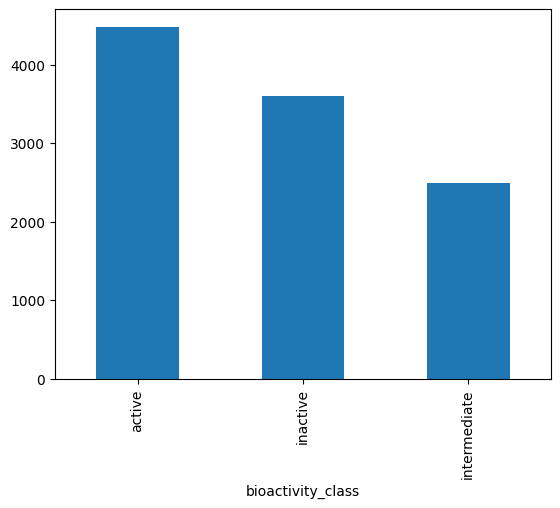

In [22]:
df_final['bioactivity_class'].value_counts().plot(kind='bar')

## **Distribution of pIC50**

<Axes: xlabel='pIC50', ylabel='Count'>

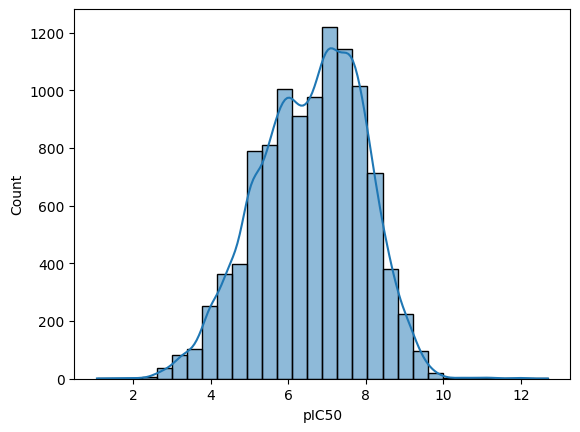

In [23]:
import seaborn as sns
sns.histplot(df['pIC50'], bins=30, kde=True)

## **Correlation Analysis**

Visualize correlation between different compound properties (e.g., molecular weight, LogP, number of hydrogen bond donors/acceptors) and bioactivity (pIC50) using a heatmap to find strong correlations that may influence bioactivity.

<Axes: >

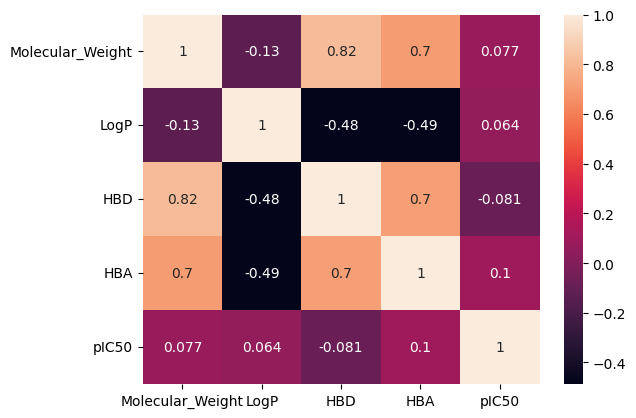

In [24]:
import matplotlib.pyplot as plt

# Select the relevant columns for correlation analysis
columns_of_interest = ['Molecular_Weight', 'LogP', 'HBD', 'HBA', 'pIC50']
df_selected = df_final[columns_of_interest]


corr_matrix = df_selected.corr()
sns.heatmap(corr_matrix, annot=True)

Correlation Coefficients range from -1 to +1. A value near 0 indicates no linear relationship between variables.

A correlation coefficient of 0.7 indicates a strong positive correlation between Molecular Weight (MW) and Hydrogen Bond Acceptors (HBA). This makes intuitive sense because larger molecules tend to have more functional groups that can accept hydrogen bonds

# **Chemical Structure Visualization**

 Visualize the least potent (lowest pIC50) and most potent (highest pIC50)molecules in the dataset.

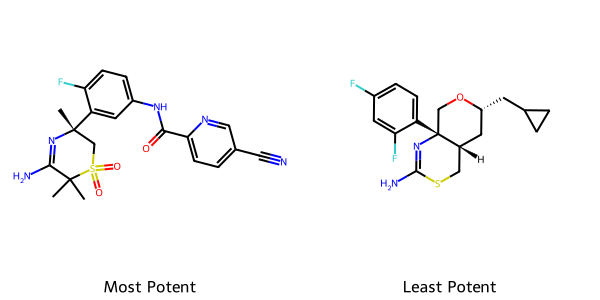

In [28]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from IPython.display import display

# Find the SMILES corresponding to the max and min pIC50
most_potent_smiles = df_final.loc[df['pIC50'].idxmax(), 'canonical_smiles']  # SMILES for the most potent molecule
least_potent_smiles = df_f.loc[df['pIC50'].idxmin(), 'canonical_smiles']  # SMILES for the least potent molecule

# Convert SMILES to RDKit Mol objects
most_potent_mol = Chem.MolFromSmiles(most_potent_smiles)
least_potent_mol = Chem.MolFromSmiles(least_potent_smiles)

# Visualize the molecules side by side
mols = [most_potent_mol, least_potent_mol]
legends = ['Most Potent', 'Least Potent']
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(300,300), legends=legends)

# Display the image
display(img)



# **Structural Diversity of Compounds via PCA**

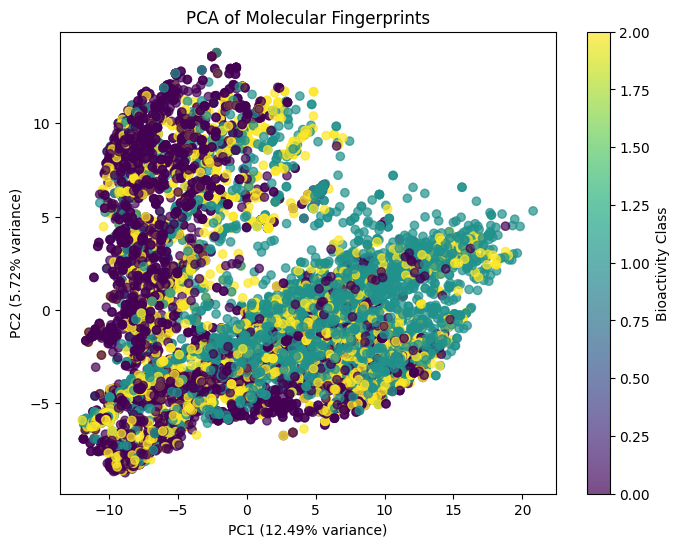

In [43]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Generate RDKit molecular fingerprints from SMILES a binary vector that represents the presence or absence of certain molecular substructures.
fp_array = [Chem.RDKFingerprint(Chem.MolFromSmiles(smiles)) for smiles in df_final['canonical_smiles']]

# Convert the RDKit fingerprints to a numpy array for compatibility with PCA
# RDKit fingerprints are initially a bit-vector, so they need to be converted to a matrix-like structure
fp_array = np.array([np.array(fp) for fp in fp_array])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)

# Perform PCA on the fingerprint array
pca_result = pca.fit_transform(fp_array)

# Get the % variance explained by the 2 principal components
variance_explained = pca.explained_variance_ratio_

#  Encode the bioactivity_class column into numeric values
le = LabelEncoder()
df_final['bioactivity_class_numeric'] = le.fit_transform(df_final['bioactivity_class'])

# Visualize the PCA results as a scatter plot
# Plot the first two principal components, using 'bioactivity_class' for color coding

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_final['bioactivity_class_numeric'], cmap='viridis', alpha=0.7)

# Update axis labels to show the % variance explained
plt.xlabel(f'PC1 ({variance_explained[0] * 100:.2f}% variance)')
plt.ylabel(f'PC2 ({variance_explained[1] * 100:.2f}% variance)')

# Add a title and color bar
plt.title('PCA of Molecular Fingerprints')
plt.colorbar(label='Bioactivity Class')
plt.show()


# **Chemical Property Distributions**

<Axes: xlabel='Molecular_Weight', ylabel='Count'>

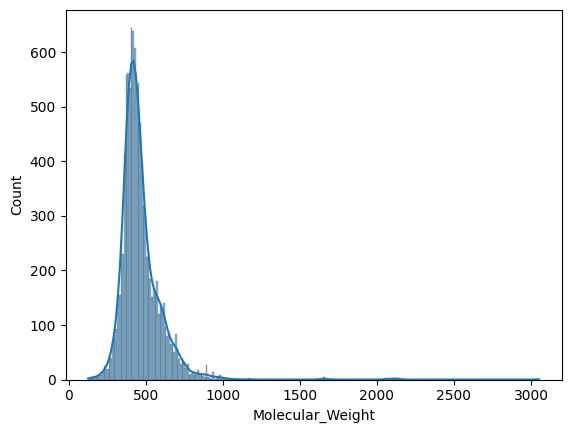

In [44]:
# 1. Molecular Weight Distribution
sns.histplot(df_final['Molecular_Weight'], kde=True)


<Axes: xlabel='bioactivity_class', ylabel='Molecular_Weight'>

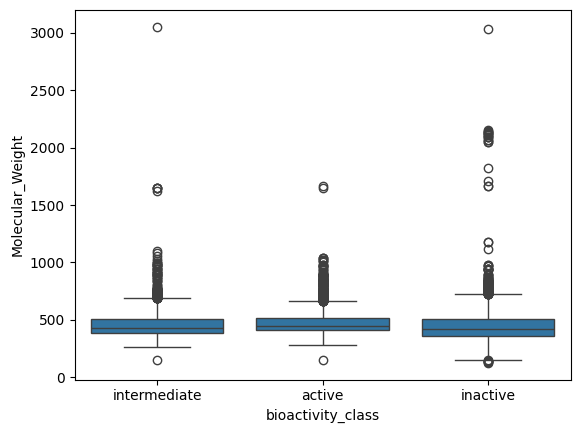

In [32]:
# 2. Bioactivity class distribution
sns.boxplot(x='bioactivity_class', y='Molecular_Weight', data=df_final)

# **Pair Plot for Compound Properties**

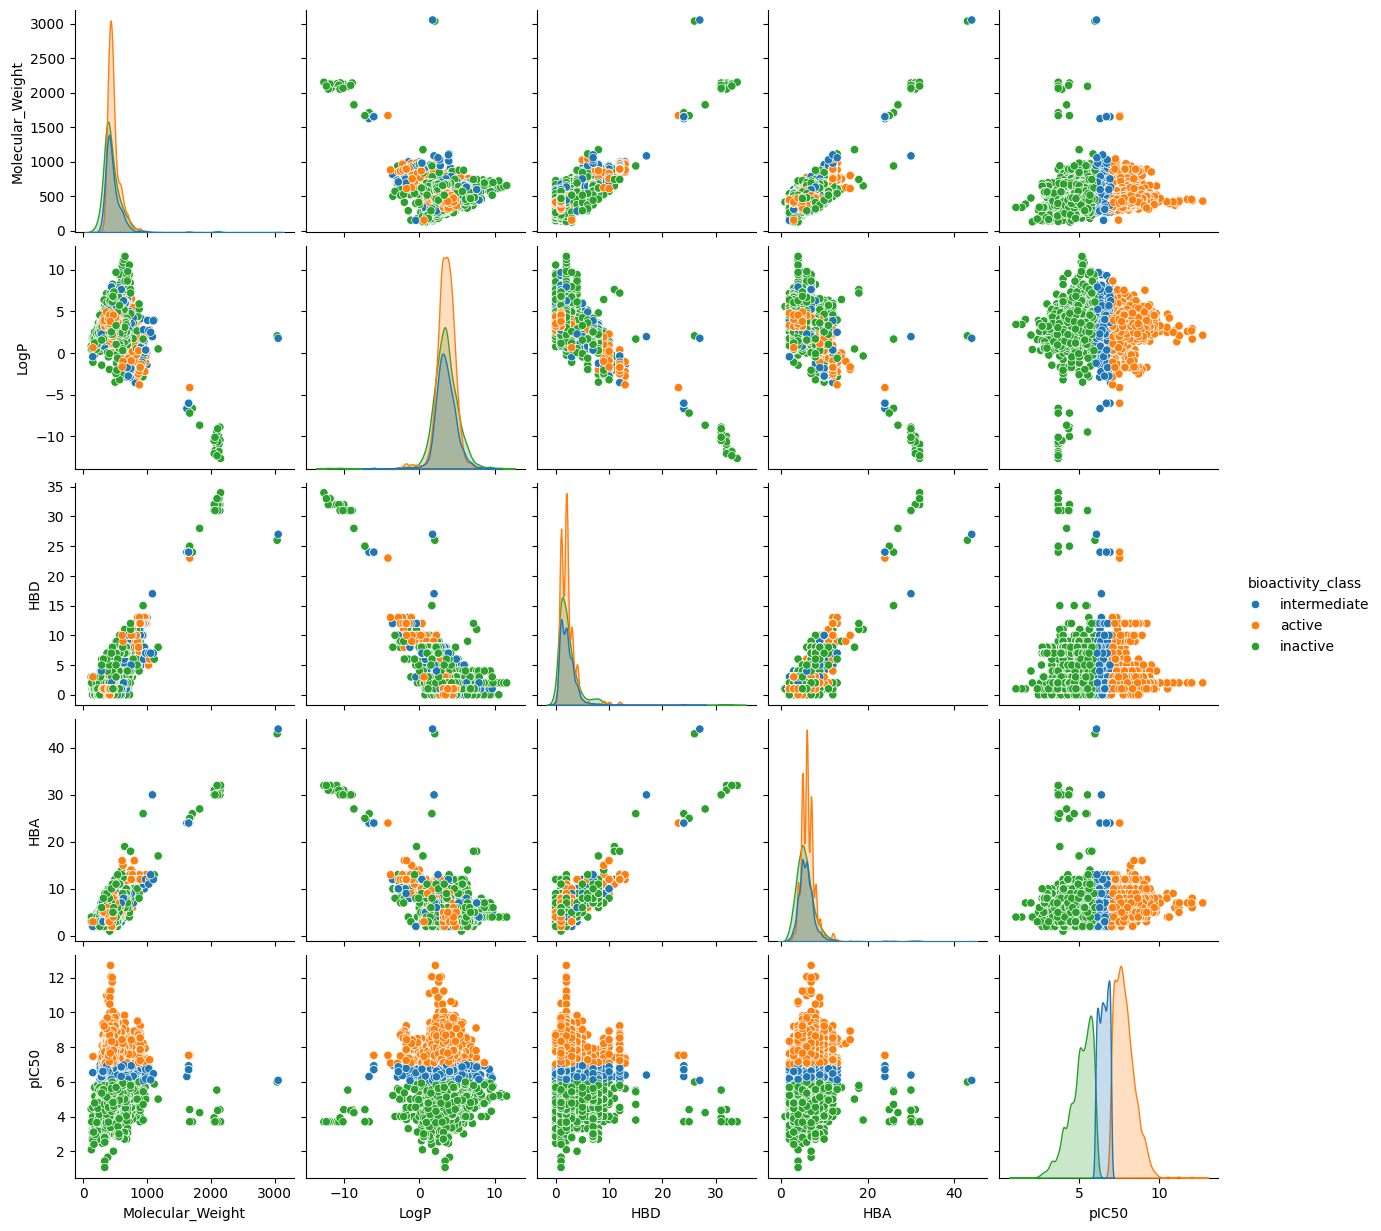

In [38]:
# Select relevant columns including 'bioactivity_class' for pair plot
columns_of_interest = ['Molecular_Weight', 'LogP', 'HBD', 'HBA', 'pIC50', 'bioactivity_class']
sns.pairplot(df_final[columns_of_interest], hue='bioactivity_class')


# **Test for Normality**

In [46]:
from scipy.stats import shapiro

# Test normality for the pIC50 values
stat, p_value = shapiro(df_final['pIC50'])
print('Shapiro-Wilk Test p-value:', p_value)

if p_value > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')


Shapiro-Wilk Test p-value: 2.7366538833341894e-24
Data is not normally distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10574.
  res = hypotest_fun_out(*samples, **kwds)


## **Check for statistically significant difference between bioactivity classes**

The Kruskal-Wallis test is used here because the data is not normally distributed. It compares the medians of two or more independent groups (e.g., active, inactive, intermediate) to determine if there are statistically significant differences between them.

In [47]:
from scipy.stats import kruskal

# Test for significant differences in pIC50 between bioactivity classes
active = df_final[df['bioactivity_class'] == 'active']['pIC50']
inactive = df_final[df['bioactivity_class'] == 'inactive']['pIC50']
intermediate = df[df_final['bioactivity_class'] == 'intermediate']['pIC50']

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(active, inactive, intermediate)
print('Kruskal-Wallis Test p-value:', p_value)

if p_value < 0.05:
    print('There is a statistically significant difference between the classes')
else:
    print('No statistically significant difference between the classes')


Kruskal-Wallis Test p-value: 0.0
There is a statistically significant difference between the classes
